In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
prices_df = pd.read_csv("/kaggle/input/nyse/prices-split-adjusted.csv")
prices_df

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [90]:
prices_df.drop(columns=['open', 'low', 'high', 'volume'], inplace=True)

In [91]:
prices_df

,date,symbol,close
0,2016-01-05,WLTW,125.839996
1,2016-01-06,WLTW,119.980003
2,2016-01-07,WLTW,114.949997
3,2016-01-08,WLTW,116.620003
4,2016-01-11,WLTW,114.970001
...,...,...,...
851259,2016-12-30,ZBH,103.199997
851260,2016-12-30,ZION,43.040001
851261,2016-12-30,ZTS,53.529999
851262,2016-12-30,AIV,45.450001


In [92]:
all_prices = prices_df.to_numpy()
prices = []
for i in range(all_prices.shape[0]):
    if all_prices[i, 1] == 'WLTW':
        prices = np.append(prices, np.array(all_prices[i]), axis=0)

In [93]:
prices = prices.reshape((251, 3))

In [94]:
for i in range(prices.shape[0]):
    prices[i, 0] = i
prices = np.delete(prices, 1, axis=1)

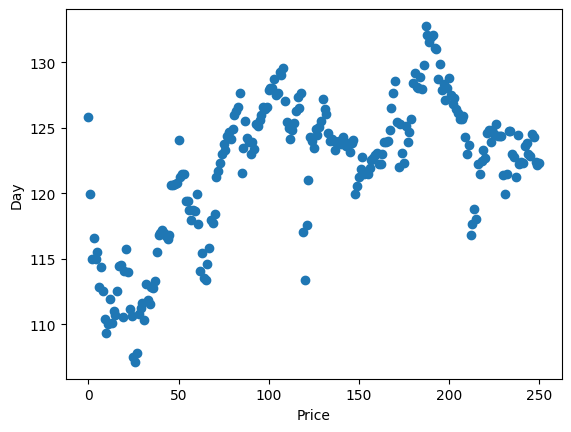

In [97]:
plt.scatter(prices[:, 0], prices[:, 1])
plt.xlabel('Price')
plt.ylabel('Day')
plt.show()

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(prices[:, 0], prices[:, 1])

In [127]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

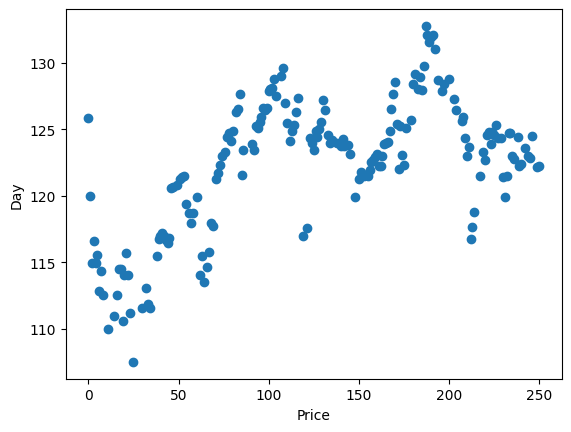

In [128]:
plt.scatter(X_train, y_train)
plt.xlabel('Price')
plt.ylabel('Day')
plt.show()

In [131]:
model = LinearRegression().fit(X_train, y_train)

In [137]:
pred = model.predict(X_test)

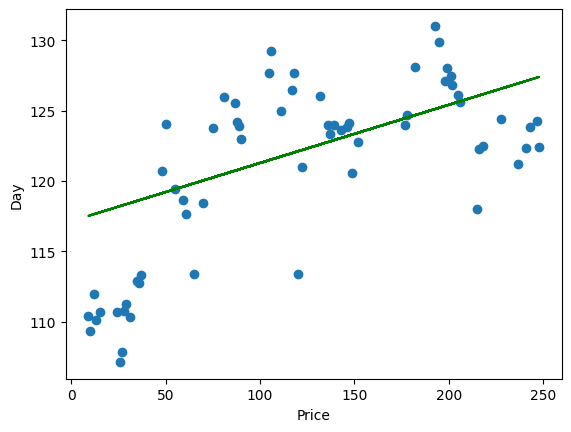

In [142]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred, c='g')
plt.xlabel('Price')
plt.ylabel('Day')
plt.show()